# qm9star database query examples

In [1]:
from sqlmodel import Session, create_engine

from qm9star_query.crud import formulas_crud, molecules_crud, snapshots_crud
from qm9star_query.models.utils import *
from qm9star_query.utils import recover_rdmol_from_snapshot

## Connect to the database

Change the variables below to fit your database setting

In [2]:
scheme = "postgresql+psycopg2"
POSTGRES_USER = "hxchem"
POSTGRES_PASSWD = "hxchem"
POSTGRES_SERVER = "10.72.201.58"
POSTGRES_PORT = 25432
POSTGRES_DB = "qm9star"

engine = create_engine(
    f"{scheme}://{POSTGRES_USER}:{POSTGRES_PASSWD}@{POSTGRES_SERVER}:{POSTGRES_PORT}/{POSTGRES_DB}"
)
session = Session(engine)

## Query a Formula

Formula in the qm9star database refers to the elemental composition of a molecule and stores a specific number of each atom, which can be used to query molecules of a specified elemental composition and molecular mass range

### Get Formula count

In [3]:
formulas_crud.get_formula_count(session=session)

ItemCount(count=1261)

### Get Formula by id

In [4]:
formula = formulas_crud.get_formula_by_id(session=session, formula_id=100)
formula

Formula(H=2, Zn=0, Eu=0, Pu=0, formula_string='H2C4N1O2', Ga=0, Gd=0, Am=0, He=0, Ge=0, Tb=0, Cm=0, Li=0, Se=0, Dy=0, Bk=0, Be=0, Br=0, Ho=0, Cf=0, B=0, Kr=0, Er=0, Es=0, C=4, Rb=0, Tm=0, Fm=0, N=1, Sr=0, Yb=0, Md=0, O=2, Y=0, Lu=0, No=0, F=0, Zr=0, Hf=0, Lr=0, Ne=0, Nb=0, Ta=0, Rf=0, Na=0, Mo=0, W=0, Db=0, Mg=0, Tc=0, Re=0, Sg=0, Al=0, Ru=0, Os=0, Bh=0, Si=0, Rh=0, Ir=0, Hs=0, P=0, Pd=0, Pt=0, Mt=0, S=0, Ag=0, Au=0, Ds=0, Cl=0, Cd=0, Hg=0, Rg=0, Ar=0, In=0, Tl=0, Cn=0, K=0, Sn=0, Pb=0, Nh=0, Ca=0, Sb=0, Bi=0, Fl=0, Sc=0, Te=0, Po=0, Mc=0, Ti=0, I=0, At=0, Lv=0, V=0, Xe=0, Rn=0, Ts=0, Cr=0, Cs=0, Fr=0, Og=0, As=0, Ba=0, Ra=0, atom_number=9, Mn=0, La=0, Ac=0, molwt=96.06499999999998, Fe=0, Ce=0, Th=0, id=100, Co=0, Pr=0, Pa=0, commit_time=datetime.datetime(2024, 4, 27, 22, 30, 43, 171626), Ni=0, Nd=0, U=0, update_time=datetime.datetime(2024, 4, 28, 18, 48, 6, 312714), Cu=0, Pm=0, Np=0, molecule_number=157, Sm=0, molecule_ids=[517, 518, 521, 1686, 1689, 1983, 1986, 2020, 2024, 2026, 2028

### Get Formulas by conditions

In [5]:
formulas_crud.get_formulas_by_conditions(
    session=session,
    formula_filter=FormulaFilter(
        numeric_filters=[NumericFilter(column="molwt", min=100, max=120)],
        element_filters=[
            ElementFilter(element="C", count=1)
        ],  # -1 for existing, 0 for non-existing, >0 for count
    ),
    limit=10,  # limit the number of results
    skip=0,  # skip the first n results
)

[Formula(H=2, Zn=0, Eu=0, Pu=0, formula_string='H2C1N7', Ga=0, Gd=0, Am=0, He=0, Ge=0, Tb=0, Cm=0, Li=0, Se=0, Dy=0, Bk=0, Be=0, Br=0, Ho=0, Cf=0, B=0, Kr=0, Er=0, Es=0, C=1, Rb=0, Tm=0, Fm=0, N=7, Sr=0, Yb=0, Md=0, O=0, Y=0, Lu=0, No=0, F=0, Zr=0, Hf=0, Lr=0, Ne=0, Nb=0, Ta=0, Rf=0, Na=0, Mo=0, W=0, Db=0, Mg=0, Tc=0, Re=0, Sg=0, Al=0, Ru=0, Os=0, Bh=0, Si=0, Rh=0, Ir=0, Hs=0, P=0, Pd=0, Pt=0, Mt=0, S=0, Ag=0, Au=0, Ds=0, Cl=0, Cd=0, Hg=0, Rg=0, Ar=0, In=0, Tl=0, Cn=0, K=0, Sn=0, Pb=0, Nh=0, Ca=0, Sb=0, Bi=0, Fl=0, Sc=0, Te=0, Po=0, Mc=0, Ti=0, I=0, At=0, Lv=0, V=0, Xe=0, Rn=0, Ts=0, Cr=0, Cs=0, Fr=0, Og=0, As=0, Ba=0, Ra=0, atom_number=10, Mn=0, La=0, Ac=0, molwt=112.07600000000002, Fe=0, Ce=0, Th=0, id=548, Co=0, Pr=0, Pa=0, commit_time=datetime.datetime(2024, 4, 28, 12, 5, 32, 808612), Ni=0, Nd=0, U=0, update_time=datetime.datetime(2024, 4, 29, 9, 0, 57, 609479), Cu=0, Pm=0, Np=0, molecule_number=3, Sm=0, molecule_ids=[503737, 1497960, 1497967]),
 Formula(H=1, Zn=0, Eu=0, Pu=0, form

The Formula class has direct access to the Molecule subclasses it contains.

In [6]:
print(formula.molecule_number)
for molecule in formula.molecules:
    print(molecule.smiles)

157
[H]/N=C1/C=C=C([O-])O1
[H]/N=C1/[C-]=CC(=O)O1
[O-]C1=C=COC=N1
O=c1c[c-]ocn1
[O-]C1=NC=C=CO1
[O-]C1=CN=C=CO1
O=c1c[c-]nco1
O=c1ncc[c-]o1
O=c1cnc[c-]o1
O=c1ccn[c-]o1
O=Cc1[c-]nco1
O=Cc1[c-]ocn1
O=[C-]c1cnco1
O=[C-]c1cocn1
O=C1C=CC([O-])=N1
O=C1C=C=C([O-])N1
N#C[C@H]1C=C([O-])O1
[N-]=C=C1CC(=O)O1
O=C1C=[C-]NC1=O
O=C1N=CC=C1[O-]
[C-]#CC(=O)C(N)=O
[O-]C1=C=CC=NO1
O=C=C1N=CC=[O+]1
O=CC12N=C1C=[O+]2
O=CC1=[N+]=C[C-]=[O+]1
N#CC(=O)C1=[O+]C1
N#CC(=O)[C@H]1C=[O+]1
O=C=C1C=[O+]C=N1
O=CC12C=[O+]C1=N2
NC(=O)C#CC#[O+]
O=C1C=C=[N+]=CO1
O=C=C1C=NC=[O+]1
O=CC1=C=NC=[O+]1
O=CC1=[O+]C2=NC21
N#C[C@]1(C#[O+])CO1
N#CC1(C=O)C=[O+]1
N#C[C@@H]1[O+]=CC1=O
N#CC1=[O+]CC1=O
N#CCC([O])=C=O
N#C[CH]C(=O)C=O
C#CC(=[N])OC=O
[H]/N=C(\C#C)O[C]=O
[H]/N=C(\C#[C])OC=O
C#CC(=O)OC=[N]
[H]/N=[C]/OC(=O)C#C
[H]/N=C/OC(=O)C#[C]
C#C[C+](=O)N[C][O-]
C#CC(=O)[N]C=O
[C]#CC(=O)NC=O
O=c1[c]conc1
O=c1cc[c]no1
[O-]C1=[CH+][C]C=NO1
O=c1[c]ccno1
O=[C]c1ccno1
[O-]/C=C1/[C][CH+]=NO1
O=Cc1c[c]no1
O=[C]c1cnoc1
[O-]/C=C1\[C]ON=[CH+]1
O=Cc1[

## Query a Molecule

Molecule represents the topology of a molecule in the qm9star database, i.e. SMILES and its derived properties, allowing vector fuzzy search with the help of molecular fingerprints.

Although the above demonstrates obtaining a Molecule directly from a Formula, this is less performant when querying on a large scale, and we can use the following to obtain more granular information.

### Get Molecule count

In [7]:
molecules_crud.get_molecule_count(session=session)

ItemCount(count=1721470)

### Get Molecule by id

In [8]:
molecule = molecules_crud.get_molecule_by_id(session=session, molecule_id=100)
molecule

Molecule(total_charge=-1, total_multiplicity=1, logp=0.04559000000000003, rdkit_fp_1024=array([1., 0., 0., ..., 0., 1., 0.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 27, 22, 30, 21, 473650), snapshot_number=1, formula_id=26, smiles='C[C@@]1(O)C[C-]1O', qed=0.4095632403911939, morgan_fp3_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), atompair_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), id=100, update_time=datetime.datetime(2024, 4, 27, 22, 30, 21, 505943), snapshot_ids=[103])

### Get Molecule by SMILES

In [9]:
molecule = molecules_crud.get_molecule_by_smiles(
    session=session, smiles="C[C@@]1(O)C[C-]1O"
)  # return None if SMILES is not found
molecule

Molecule(total_charge=-1, total_multiplicity=1, logp=0.04559000000000003, rdkit_fp_1024=array([1., 0., 0., ..., 0., 1., 0.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 27, 22, 30, 21, 473650), snapshot_number=1, formula_id=26, smiles='C[C@@]1(O)C[C-]1O', qed=0.4095632403911939, morgan_fp3_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), atompair_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), id=100, update_time=datetime.datetime(2024, 4, 27, 22, 30, 21, 505943), snapshot_ids=[103])

### Get Molecules by SMILES (Fingerprint internal)

This will perform a library-wide vector calculation to obtain a number of molecules that are closest to the input SMILES under the specified molecular fingerprint. This process is significantly slower than other queries (a single query on a database running on 14700K takes more than 1 minute), so it should be used with caution.

SMILES vector sorting is also supported in the next step of conditional retrieval, but the number of vectors that need to be computed becomes smaller due to the limitation of other conditions (if they exist), and we prefer to use the following method.

In [10]:
molecules_crud.get_molecules_by_smiles(
    session=session,
    smiles="CCCC",
    method="morgan",
    distance="inner_product",
    skip=0,
    limit=5,
)

[Molecule(total_charge=-1, total_multiplicity=1, logp=1.12689, rdkit_fp_1024=array([0., 0., 1., ..., 0., 1., 1.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 28, 12, 1, 39, 347657), snapshot_number=1, formula_id=395, smiles='CCC[CH-]CCNC=O', qed=0.3240573693485511, morgan_fp3_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), atompair_fp_1024=array([0., 0., 0., ..., 1., 0., 0.], dtype=float32), id=493886, update_time=datetime.datetime(2024, 4, 28, 12, 1, 39, 381146), snapshot_ids=[503414]),
 Molecule(total_charge=0, total_multiplicity=1, logp=2.752700000000001, rdkit_fp_1024=array([1., 1., 0., ..., 0., 1., 0.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 29, 11, 17, 38, 809982), snapshot_number=1, formula_id=910, smiles='CCC[C@@]12C=CC[C@@H]1C2', qed=0.49391213296725806, morgan_fp3_1024=array([0., 

### Get Molecules by conditions

In [11]:
molecules_crud.get_molecules_by_conditions(
    session=session,
    molecule_filter=MoleculeFilter(
        smiles="CCCC",
        method="morgan",
        distance="inner_product",
        numeric_filters=[
            NumericFilter(
                column="molwt",
                min=50,
                max=80,
            )
        ],
        element_filters=[ElementFilter(element="N", count=-1)],
    ),
    skip=0,
    limit=10,
)

[Molecule(total_charge=0, total_multiplicity=1, logp=1.31008, rdkit_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 29, 10, 42, 53, 574145), snapshot_number=1, formula_id=829, smiles='CCCC#N', qed=0.45506987992747255, morgan_fp3_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), atompair_fp_1024=array([0., 0., 0., ..., 1., 0., 0.], dtype=float32), id=1591880, update_time=datetime.datetime(2024, 4, 29, 10, 42, 53, 656211), snapshot_ids=[1623077]),
 Molecule(total_charge=-1, total_multiplicity=1, logp=-0.26602999999999993, rdkit_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 27, 22, 34, 6, 624688), snapshot_number=1, formula_id=8, smiles='[H]/N=C(/[O-])CC', qed=0.3362500626393042, morgan_fp3_1024=array([0., 0., 0., ...

The Molecule class has direct access to the Formula and Snapshot subclasses it contains.

In [12]:
molecule.formula

Formula(H=7, Zn=0, Eu=0, Pu=0, formula_string='H7C4O2', Ga=0, Gd=0, Am=0, He=0, Ge=0, Tb=0, Cm=0, Li=0, Se=0, Dy=0, Bk=0, Be=0, Br=0, Ho=0, Cf=0, B=0, Kr=0, Er=0, Es=0, C=4, Rb=0, Tm=0, Fm=0, N=0, Sr=0, Yb=0, Md=0, O=2, Y=0, Lu=0, No=0, F=0, Zr=0, Hf=0, Lr=0, Ne=0, Nb=0, Ta=0, Rf=0, Na=0, Mo=0, W=0, Db=0, Mg=0, Tc=0, Re=0, Sg=0, Al=0, Ru=0, Os=0, Bh=0, Si=0, Rh=0, Ir=0, Hs=0, P=0, Pd=0, Pt=0, Mt=0, S=0, Ag=0, Au=0, Ds=0, Cl=0, Cd=0, Hg=0, Rg=0, Ar=0, In=0, Tl=0, Cn=0, K=0, Sn=0, Pb=0, Nh=0, Ca=0, Sb=0, Bi=0, Fl=0, Sc=0, Te=0, Po=0, Mc=0, Ti=0, I=0, At=0, Lv=0, V=0, Xe=0, Rn=0, Ts=0, Cr=0, Cs=0, Fr=0, Og=0, As=0, Ba=0, Ra=0, atom_number=13, Mn=0, La=0, Ac=0, molwt=87.098, Fe=0, Ce=0, Th=0, id=26, Co=0, Pr=0, Pa=0, commit_time=datetime.datetime(2024, 4, 27, 22, 30, 19, 304381), Ni=0, Nd=0, U=0, update_time=datetime.datetime(2024, 4, 28, 18, 30, 10, 193803), Cu=0, Pm=0, Np=0, molecule_number=355, Sm=0, molecule_ids=[75, 76, 77, 78, 97, 98, 99, 100, 101, 163, 164, 204, 205, 206, 207, 241, 

In [13]:
molecule.snapshots

[Snapshot(standard_coords=[[0.5592389702796936, 1.4492930173873901, 0.34808599948883057], [0.48539599776268005, -0.017389999702572823, -0.01475599966943264], [1.6917979717254639, -0.4464530050754547, -0.698291003704071], [-0.17096300423145294, -0.9754049777984619, 0.9397900104522705], [-0.7801560163497925, -0.6570850014686584, -0.45788800716400146], [-1.903601050376892, 0.30454400181770325, -0.32567599415779114], [-0.36834898591041565, 1.7695039510726929, 0.8276619911193848], [1.4007869958877563, 1.6651569604873657, 1.022902011871338], [0.6929619908332825, 2.0464649200439453, -0.5626270174980164], [2.3490779399871826, -0.573809027671814, -0.00279999990016222], [0.2346380054950714, -1.9741530418395996, 1.0930830240249634], [-0.6161190271377563, -0.5235159993171692, 1.8313219547271729], [-2.559675931930542, -0.07085400074720383, -0.9091969728469849]], solvent='', enthalpy_correction=0.109284, alpha_lumo=0.025049999356269836, spin_eginvalue=None, mo_bond_order=[], id=103, frame_id=17, qm_

## Query a snapshot

Snapshot represents in the qm9star database a specific spatial feature of the topology of a molecule, i.e. a set of atomic coordinates and their corresponding quantum chemical properties.

### Get Snapshot count

In [14]:
snapshots_crud.get_snapshot_count(session=session)

ItemCount(count=1751509)

### Get Snapshot by id

In [15]:
snapshot = snapshots_crud.get_snapshot_by_id(session=session, snapshot_id=100)
snapshot

Snapshot(standard_coords=[[0.4643940031528473, 1.5120879411697388, 0.3349739909172058], [0.514132022857666, 0.07151100039482117, 0.06457299739122391], [1.6866999864578247, -0.5126789808273315, -0.6062290072441101], [-0.17552700638771057, -0.9113630056381226, 1.0002249479293823], [-0.7720310091972351, -0.5823739767074585, -0.36547499895095825], [-1.8874460458755493, 0.2619050145149231, -0.4343799948692322], [0.8972020149230957, 1.8333510160446167, 1.2865439653396606], [0.7716439962387085, 2.134665012359619, -0.5121949911117554], [2.37231707572937, 0.13523900508880615, -0.40880998969078064], [0.3009679913520813, -1.881005048751831, 1.1153500080108643], [-0.6870459914207458, -0.5213729739189148, 1.8745449781417847], [-0.7586830258369446, -1.3503559827804565, -1.133005976676941], [-1.4762519598007202, 1.116510033607483, -0.10333699733018875]], solvent='', enthalpy_correction=0.108804, alpha_lumo=0.010169999673962593, spin_eginvalue=None, mo_bond_order=[], id=100, frame_id=38, qm_software='

### Get Snapshots by Conditions

In [16]:
snapshots_crud.get_snapshots_by_conditions(
    session=session,
    snapshot_filter=SnapshotFilter(
        numeric_filters=[NumericFilter(column="molwt", min=50, max=80)],
        class_filters=[ClassFilter(column="functional", values=["rb3lyp"])],
        bool_filters=[BoolFilter(column="is_optimized", value=True)],
        element_filters=[ElementFilter(element="N", count=-1)],
        smiles="CCCC",
        method="morgan",
        distance="inner_product",
    ),
    skip=0,
    limit=10,
)

[Snapshot(standard_coords=[[2.3054230213165283, 0.01548600010573864, 1.2000000424450263e-05], [0.876213014125824, -0.5253589749336243, -1.4000000192027073e-05], [-0.1615470051765442, 0.6134170293807983, -1.5999999959603883e-05], [-1.536370038986206, 0.12314700335264206, 2.700000004551839e-05], [-2.613956928253174, -0.2872239947319031, -3.000000106112566e-06], [3.0305209159851074, -0.8012580275535583, 2.499999936844688e-05], [2.49674391746521, 0.6310269832611084, -0.8839550018310547], [2.4967129230499268, 0.631026029586792, 0.8839859962463379], [0.7094839811325073, -1.1567130088806152, -0.8769840002059937], [0.7094569802284241, -1.1567200422286987, 0.876945972442627], [-0.02376299910247326, 1.2515369653701782, 0.8788250088691711], [-0.023771999403834343, 1.2515250444412231, -0.8788719773292542]], solvent='', enthalpy_correction=0.109442, alpha_lumo=-0.33243000507354736, spin_eginvalue=None, mo_bond_order=[], id=1623077, frame_id=6, qm_software='Gaussian', temperature=298.15, gibbs_free_

The Snapshot class has direct access to the Formula and Molecule subclasses it contains.

In [17]:
snapshot.molecule

Molecule(total_charge=-1, total_multiplicity=1, logp=-0.68381, rdkit_fp_1024=array([1., 0., 0., ..., 0., 1., 0.], dtype=float32), topological_torsion_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), commit_time=datetime.datetime(2024, 4, 27, 22, 30, 21, 215018), snapshot_number=1, formula_id=26, smiles='[CH2-][C@@]1(O)C[C@H]1O', qed=0.38404860868779966, morgan_fp3_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), atompair_fp_1024=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), id=97, update_time=datetime.datetime(2024, 4, 27, 22, 30, 21, 247105), snapshot_ids=[100])

In [18]:
snapshot.molecule.formula

Formula(H=7, Zn=0, Eu=0, Pu=0, formula_string='H7C4O2', Ga=0, Gd=0, Am=0, He=0, Ge=0, Tb=0, Cm=0, Li=0, Se=0, Dy=0, Bk=0, Be=0, Br=0, Ho=0, Cf=0, B=0, Kr=0, Er=0, Es=0, C=4, Rb=0, Tm=0, Fm=0, N=0, Sr=0, Yb=0, Md=0, O=2, Y=0, Lu=0, No=0, F=0, Zr=0, Hf=0, Lr=0, Ne=0, Nb=0, Ta=0, Rf=0, Na=0, Mo=0, W=0, Db=0, Mg=0, Tc=0, Re=0, Sg=0, Al=0, Ru=0, Os=0, Bh=0, Si=0, Rh=0, Ir=0, Hs=0, P=0, Pd=0, Pt=0, Mt=0, S=0, Ag=0, Au=0, Ds=0, Cl=0, Cd=0, Hg=0, Rg=0, Ar=0, In=0, Tl=0, Cn=0, K=0, Sn=0, Pb=0, Nh=0, Ca=0, Sb=0, Bi=0, Fl=0, Sc=0, Te=0, Po=0, Mc=0, Ti=0, I=0, At=0, Lv=0, V=0, Xe=0, Rn=0, Ts=0, Cr=0, Cs=0, Fr=0, Og=0, As=0, Ba=0, Ra=0, atom_number=13, Mn=0, La=0, Ac=0, molwt=87.098, Fe=0, Ce=0, Th=0, id=26, Co=0, Pr=0, Pa=0, commit_time=datetime.datetime(2024, 4, 27, 22, 30, 19, 304381), Ni=0, Nd=0, U=0, update_time=datetime.datetime(2024, 4, 28, 18, 30, 10, 193803), Cu=0, Pm=0, Np=0, molecule_number=355, Sm=0, molecule_ids=[75, 76, 77, 78, 97, 98, 99, 100, 101, 163, 164, 204, 205, 206, 207, 241, 

### Transform into RDKit

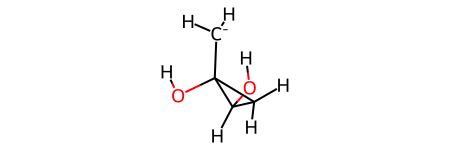

In [19]:
recover_rdmol_from_snapshot(snapshot)